In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
print('Dataset\n',dataset_train.head())
training_set = dataset_train.iloc[:, 1:2].values
print('Training set column\n', training_set)

Dataset
        Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
Training set column
 [[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print('Printing X_train\n', X_train)
print('Printing y_train\n', y_train)

Printing X_train
 [[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
Printing y_train
 [0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [3]:
# Reshaping
# 3D tensor with shape (batch_size, timesteps, input_dim).
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [4]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation(20%)
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation. No need to specify return_seq because this is the last LSTM layer.
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0448
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

In [5]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print("Real stock price:\n", real_stock_price)

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print("Total Dataset:\n", dataset_total)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
print("Inputs look like:\n", inputs)

# Transform the inputs for feeding it into the predict function
inputs = sc.transform(inputs)


Real stock price:
 [[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
Total Dataset:
 0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64
Inputs look like:
 [[779.  ]
 [779.66]
 [777.71]
 [786.66]
 [783.76]
 [781.22]
 [781.65]
 [779.8 ]
 [787.85]
 [798.24]
 [803.3 ]
 [795.  ]
 [804.9 ]
 [816.68]
 [806.34]
 [801.  ]
 [808.35]
 [795.47]
 [782.89]
 [778.2 ]
 [767.25]
 [750.66]
 [774.5 ]
 [783.4 ]
 [779.94]
 [791.17]
 [756.54]
 [755.6 ]
 [746.97]
 [755.2 ]
 [766.92]
 [771.37]
 [762.61]
 [772.63]
 [767.73]
 [764.26]
 [760.  ]
 [771.53]
 [770.07]
 [757.44]
 [744.59]
 [757.71]
 [764.73]
 [761.  ]
 [772.48]
 [780.  ]
 [785.04]
 [793.9 ]
 [797.4 ]
 [797.34]
 [800.4 ]
 [790.22]
 [796.76]
 [795.84]
 [792.36]
 [790.9 ]
 

In [23]:
# Prepare test data by collecting 60 inputs for each prediction
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
print(X_test)

[array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
       0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
       0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
       0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
       0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
       0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
       0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
       0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
       0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
       0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
       0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
       0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146]), array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
       0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
       0.95966962, 0.97808617, 1.        , 0.98076494, 0.97

In [24]:
# Test Data Preparation
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print("Modified X_test:\n", X_test)


Modified X_test:
 [[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [25]:
# Perform actual prediction using predict function
predicted_stock_price = regressor.predict(X_test)
# Transform the data back to original values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
predicted_stock_price

array([[794.7536 ],
       [792.2428 ],
       [791.9513 ],
       [792.8844 ],
       [795.7345 ],
       [801.0724 ],
       [806.5316 ],
       [809.54755],
       [810.61304],
       [810.6424 ],
       [810.27783],
       [809.7472 ],
       [809.28436],
       [809.48785],
       [810.2371 ],
       [814.12494],
       [820.4368 ],
       [827.71747],
       [832.5269 ],
       [830.33307]], dtype=float32)

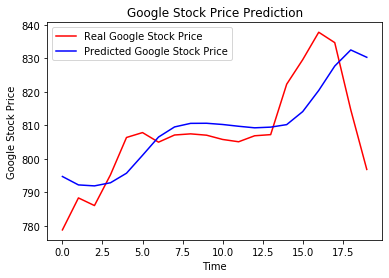

In [29]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()